In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pytorch_model import OrigamiNetwork
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
digits = load_digits()
X = digits.data 
y = digits.target

X = X.astype('float32')
y = y.astype('int64')

X /= 16.0 


X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

model = OrigamiNetwork(
    n_layers=1,
    width=X.shape[1],
    epochs=300,
    learning_rate=0.01,
    sigmoid=True,
    crease=5,
    optimizer_type="adam",
    batch_size=32
)

# Train the model
model.fit(X_train, y_train, X_val, y_val)

# Evaluate on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train model
model = OrigamiNetwork(n_layers=4, width=10, epochs=300,learning_rate = 0.001, optimizer_type = 'adam')
model.fit(X_train, y_train, X_val, y_val)

#Evaluate on validation set
y_pred = model.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

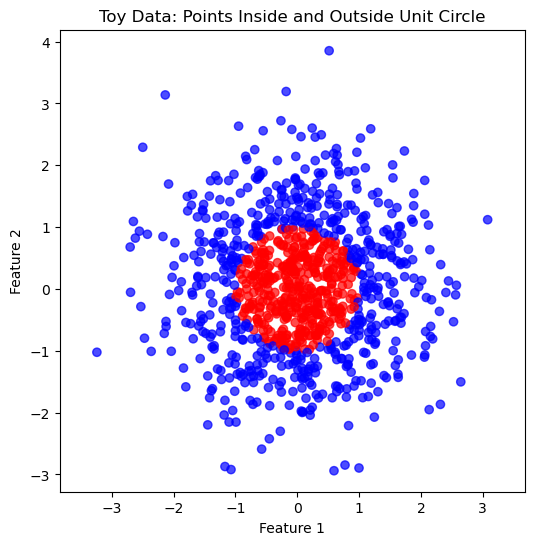

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

width = 2
# Generate random points in 2D space
X = np.random.randn(n_samples, width)

# Labels: Points inside the unit circle are labeled True (1), others False (0)
y = (np.linalg.norm(X, axis=1) < 1).astype(int)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title('Toy Data: Points Inside and Outside Unit Circle')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

In [3]:
# Split data: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
layers = 4
model = OrigamiNetwork(
    n_layers=layers,
    width=2,
    epochs=1000,
    learning_rate=0.001,
    sigmoid=True,  # Set to True if you want to use the sigmoid fold
    crease=5,
    optimizer_type='sgd',  # Use 'sgd' or 'adam'
    batch_size=32
)

In [5]:
model.fit(X,y)

/Users/jeddybennett/Documents/FoldAndCutNetworks/pytorch_model.py:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


Visualizing folds at Layer 0


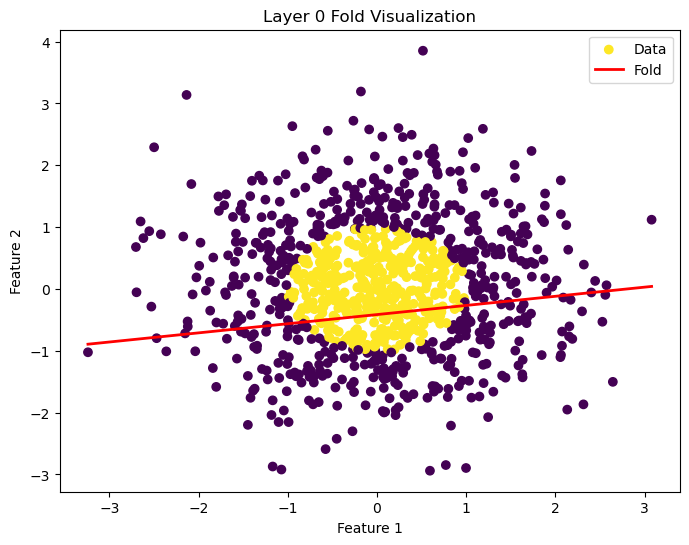

Visualizing folds at Layer 1


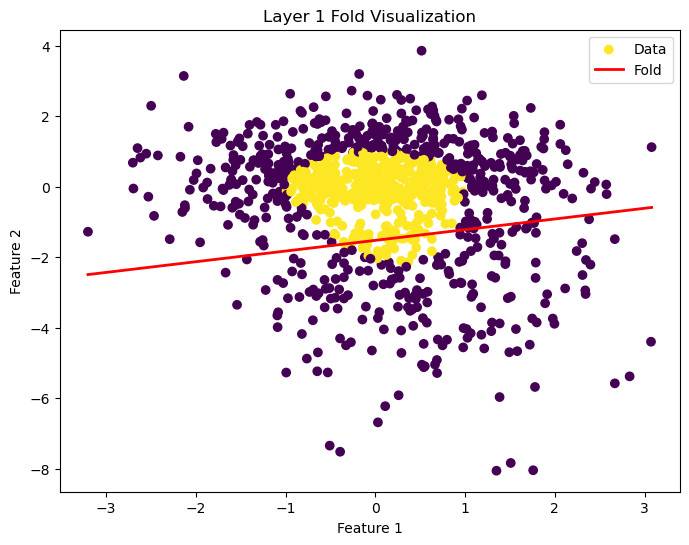

Visualizing folds at Layer 2


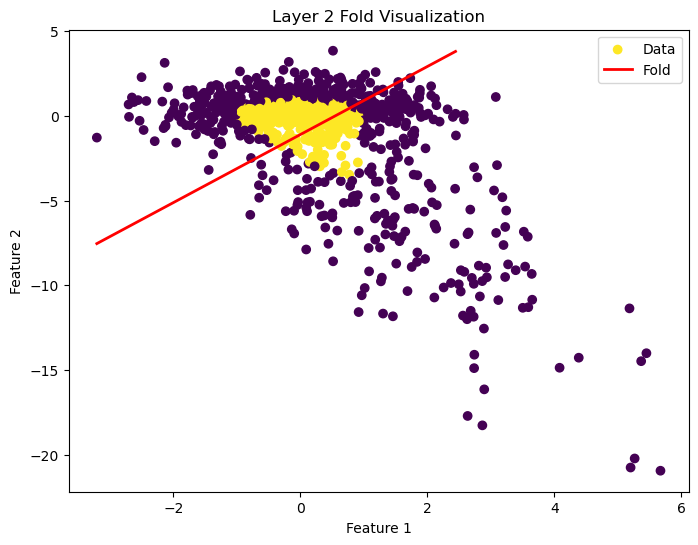

Visualizing folds at Layer 3


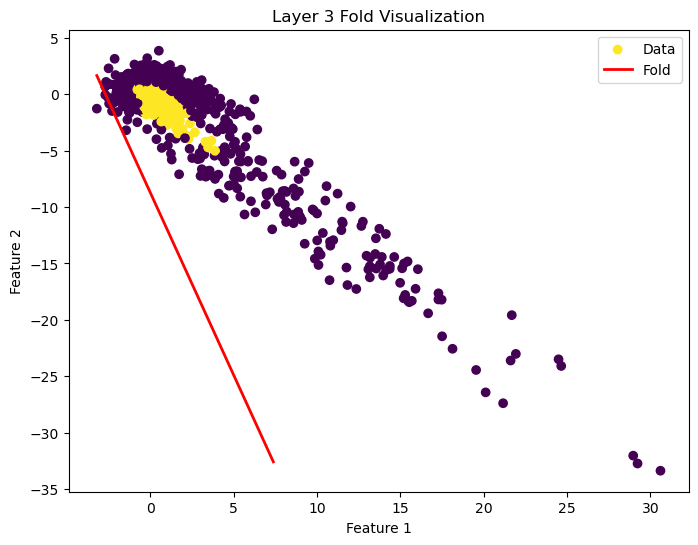

In [6]:
# Visualize folds at each layer
for layer_index in range(layers):
    print(f"Visualizing folds at Layer {layer_index}")
    model.plot_folds(X, y, layer_index=layer_index, use_plotly=False)